## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()
# Display the data table for preview
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice = merge_table["Mouse ID"].unique()
mice_num = len(mice)
print(f"The number of mice is {mice_num}!")

The number of mice is 249!


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merge_table.loc[merge_table.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_table[merge_table["Mouse ID"].isin(duplicate_mouse) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_df["Mouse ID"].unique())
print(f"There is a total of {Mouse_Count} mice used in this study!") 

There is a total of 248 mice used in this study!


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mr_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=mr_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mr_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mr_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mr_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mr_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"mean":mean,"median":median,"variance":variance, "SD": sd, "SEM": sem})
analysis_df=analysis_df.round(2)

analysis_df

,mean,median,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_single = mr_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})

print(grouped_single)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

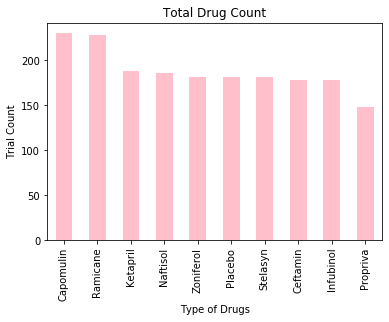

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index
drug_counts.plot(kind="bar", facecolor='pink',)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()


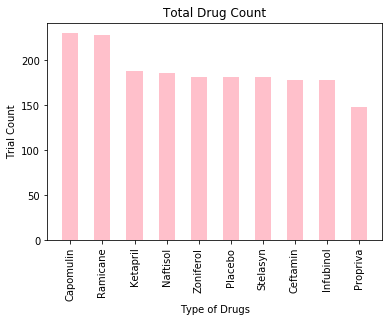

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts= clean_df["Drug Regimen"].value_counts()

y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
plt.bar(x_drugs, y_axis, color='pink', alpha=1.0, align= "center", width= .5)

plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()


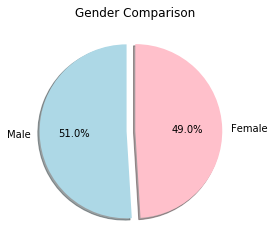

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_count=clean_df["Sex"].value_counts()
labels=mf_count.values
sizes=mf_count.values
colors=["lightblue", "pink"]
explode=[0.1,0]

mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()


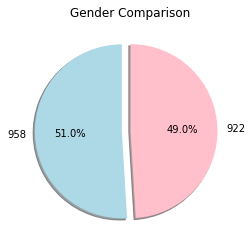

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()
max_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')
merge_data.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [18]:
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"Numbers below {round(lower_ocap, 2)} are potential outliers(Capomulin)")
print(f"Numbers above {round(upper_ocap, 2)} are potential outlier(Capomulin)")

Numbers below 20.7 are potential outliers(Capomulin)
Numbers above 51.83 are potential outlier(Capomulin)


In [19]:
#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Numbers below {round(lower_oram, 2)} are potential outliers(Ramicane)")
print(f"Numbers above {round(upper_oram, 2)} are potential outliers(Ramicane)")

Numbers below 17.91 are potential outliers(Ramicane)
Numbers above 54.31 are potential outliers(Ramicane)


In [20]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Numbers below {round(lower_oin, 2)} are potential outliers(Infubionol)")
print(f"Numbers above {round(upper_oin, 2)} are potential outliers(Infubionol)")

Numbers below 36.83 are potential outliers(Infubionol)
Numbers above 82.74 are potential outliers(Infubionol)


In [21]:
#Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Numbers below {round(lower_oce, 2)} are potential outliers(Ceftmain)")
print(f"Numbers above {round(upper_oce, 2)} are potential outliers(Ceftmain)")

Numbers below 25.36 are potential outliers(Ceftmain)
Numbers above 87.67 are potential outliers(Ceftmain)


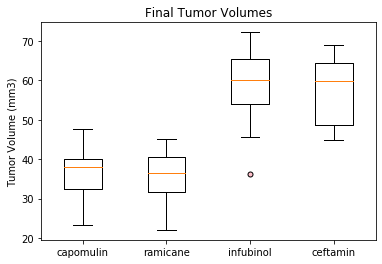

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pink_out = dict(markerfacecolor='pink',markersize=5)

plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"],flierprops= pink_out)

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

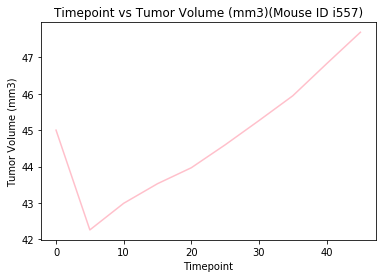

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'i557']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"],color = 'pink')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)(Mouse ID i557)")
plt.show()
capomulin_table


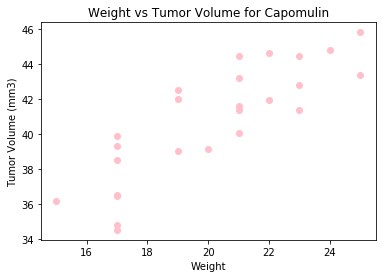

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg=capomulin_table.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"], color='pink' )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()



## Correlation and Regression

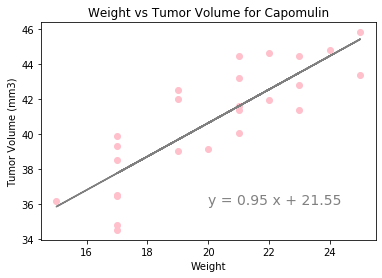

Correlation coefficient: 0.84


In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"],color='pink' )
plt.plot(cap_avg["Weight (g)"], regress_values, color='gray')
plt.annotate(line_eq,(20,36), color='gray', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show() 

print(f"Correlation coefficient: {round(rvalue, 2)}")

# Observation

1. Mouse weight and average tumor volume for the Capomulin regimen have positive correlation

2. The final tumor volume of mouse across Infubinol and Ceftamin of the treatment regimens is bigger than Capomulin and Ramicane.

3. The distribution of female versus male mice is 51% vs 49%.